In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [21]:
#Read CSV file from the url to DataFrame
url = "https://github.com/Brunel-Visualization/Brunel/raw/master/python/examples/data/whiskey.csv"
s = requests.get(url).text
wk = pd.read_csv(StringIO(s))

In [22]:
wk.head()

,Name,Rating,Country,Category,Price,ABV,Age,Brand
0,Canadian Hunter Canadian Whisky,40.0,Canada,Blended,9.0,40.0,NaN,Canadian Hunter
1,Canadian LTD Blended Canadian Whiskey,43.0,Canada,Blended,10.0,NaN,NaN,Canadian LTD
2,Kellan Irish Whiskey,47.0,Ireland,Blended,20.0,40.0,NaN,Kellan
3,Rich & Rare Canadian Whisky,47.0,Canada,Blended,10.0,NaN,NaN,Rich & Rare
4,Canadian Mist Blended Canadian Whisky,48.0,Canada,Blended,12.0,40.0,NaN,Canadian Mist


In [23]:
wk.drop('Name',axis=1,inplace=True)
wk.drop('Country',axis=1,inplace=True)
wk.drop('Category',axis=1,inplace=True)
wk.drop('Age',axis=1,inplace=True)
wk.drop('Brand',axis=1,inplace=True)

In [24]:
wk.head()

,Rating,Price,ABV
0,40.0,9.0,40.0
1,43.0,10.0,NaN
2,47.0,20.0,40.0
3,47.0,10.0,NaN
4,48.0,12.0,40.0


In [25]:
wk.isna().sum()

Rating    11
Price      4
ABV       13
dtype: int64

In [26]:
wk.describe()

,Rating,Price,ABV
count,272.000000,279.000000,270.000000
mean,84.474265,72.483871,44.610444
std,11.877887,83.992242,5.883056
min,40.000000,2.000000,35.500000
25%,80.000000,30.000000,40.000000
50%,88.000000,50.000000,43.000000
75%,94.000000,80.000000,46.000000
max,100.000000,850.000000,68.200000


In [27]:
wk.dropna(inplace = True)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


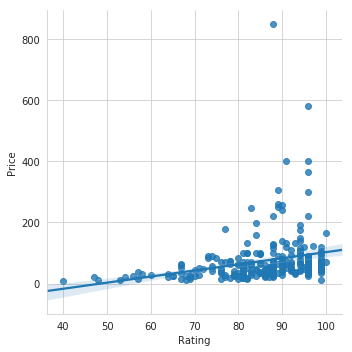

In [28]:
sns.set_style('whitegrid')
sns.lmplot('Rating','Price',data=wk)

In [29]:
data = wk.values

In [30]:
def outlier(x):
    q1, q3 = np.percentile(x,[25, 75])
    iqr = q3 - q1
    cut = 1.5 * iqr  
    return [i for i in range(x.shape[0]) if x[i] < q1-cut or x[i]>q3+cut]

def all_out(x):
    idx = []
    for i in range(x.shape[1]):
        idx = np.concatenate((idx, outlier(x[:,i])))
    return list(set(idx))

In [31]:
idx = all_out(data)
print(len(idx),idx)
data = np.delete(data, idx, axis=0)
print(data.shape)

49 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 132.0, 259.0, 133.0, 141.0, 256.0, 143.0, 257.0, 155.0, 156.0, 158.0, 159.0, 160.0, 162.0, 46.0, 174.0, 176.0, 51.0, 59.0, 60.0, 67.0, 195.0, 197.0, 199.0, 202.0, 208.0, 80.0, 210.0, 213.0, 214.0, 89.0, 220.0, 97.0, 227.0, 100.0, 229.0, 232.0, 254.0, 125.0, 126.0]
(211, 3)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
data = StandardScaler().fit_transform(data)
print(data)

[[-2.44575494e+00 -8.36453897e-01 -9.27503802e-01]
 [-2.44575494e+00 -1.17644961e+00 -9.27503802e-01]
 [-2.33453634e+00 -1.04045132e+00 -9.27503802e-01]
 [-2.33453634e+00 -1.00645175e+00 -9.27503802e-01]
 [-2.11209915e+00 -6.66456043e-01 -9.27503802e-01]
 [-2.11209915e+00 -1.56462480e-01 -7.57187153e-02]
 [-2.11209915e+00  1.83533228e-01 -9.27503802e-01]
 [-2.11209915e+00  3.53531083e-01 -9.27503802e-01]
 [-2.11209915e+00 -1.38044703e+00 -9.27503802e-01]
 [-2.00088055e+00 -1.00645175e+00 -9.27503802e-01]
 [-2.00088055e+00 -1.44844617e+00 -9.27503802e-01]
 [-1.88966195e+00 -1.07445089e+00 -9.27503802e-01]
 [-1.88966195e+00 -1.07445089e+00 -9.27503802e-01]
 [-1.88966195e+00 -1.34644746e+00 -9.27503802e-01]
 [-1.88966195e+00 -9.38452610e-01  4.92138009e-01]
 [-1.88966195e+00 -1.17644961e+00 -9.27503802e-01]
 [-1.77844335e+00 -3.26460334e-01 -7.57187153e-02]
 [-1.77844335e+00 -9.72452181e-01 -9.27503802e-01]
 [-1.66722476e+00 -9.38452610e-01 -9.27503802e-01]
 [-1.66722476e+00 -1.56462480e-

In [33]:
label = np.array(['low' if d <= 1/3  else 'medium' if d <= 2/3 else 'high' for d in data[:,1]])

In [34]:
wk = pd.DataFrame(data={"Rating":(data[:,0]),
                        "ABV":(data[:,2]),
                        "Price":(label)})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


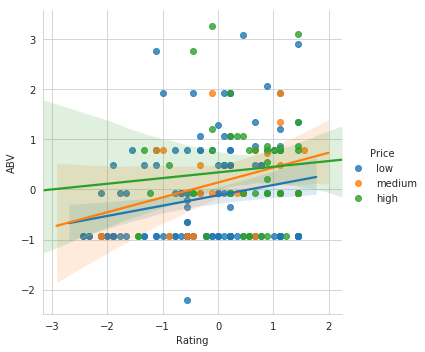

In [35]:
sns.set_style('whitegrid')
sns.lmplot('Rating','ABV',data=wk, hue='Price')

In [36]:
kmeans = KMeans(n_clusters=2)

In [37]:
kmeans.fit(wk.drop('Price',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
kmeans.cluster_centers_

array([[ 0.6315919 ,  0.42177415],
       [-0.90019995, -0.60114936]])

In [39]:
def converter(cluster):
    if cluster=='low':
        return 0
    elif cluster=='medium':
        return 1
    else:
        return 2

In [40]:
wk['Cluster'] = wk['Price'].apply(converter)

In [48]:
#print(confusion_matrix(wk['Cluster'],kmeans.labels_))
#print(classification_report(wk['Cluster'],kmeans.labels_))